In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'

data = pd.read_csv(file_url)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
# 결측치 있는 변수 : workclass / occupation / native-country

data.describe(include = 'all') # int 형만 나옴 



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
# class ( '<=50K' : 0 , '>50K' : 1)
# data['class'].unique()
data['class'] = data['class'].map({' <=50K':0 ,' >50K':1})

# 결과값 0  , 1 로 변경




In [8]:
# object 형 변수들 list 로 추출
obj_list = []

for i in data.columns:
  if data[i].dtype == 'object':
    obj_list.append(i)

obj_list


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [9]:
# 전처리 변수 선별하기

for i in obj_list: #순회
  print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [10]:
for i in obj_list:
  if data[i].nunique() >= 10:
    print(i,data[i].nunique())
    
# education / occupation / native-country



education 16
occupation 14
native-country 41


In [11]:
data['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [12]:
## education => 학력으로 서열화 가능  ,  education_num 으로 대체

np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [13]:
data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [14]:
# education-num 별 실제 고유값 확인
for i in np.sort(data['education-num'].unique()):
  print(i, data[data['education-num']==i]['education'].unique())

1 [' Preschool']
2 [' 1st-4th']
3 [' 5th-6th']
4 [' 7th-8th']
5 [' 9th']
6 [' 10th']
7 [' 11th']
8 [' 12th']
9 [' HS-grad']
10 [' Some-college']
11 [' Assoc-voc']
12 [' Assoc-acdm']
13 [' Bachelors']
14 [' Masters']
15 [' Prof-school']
16 [' Doctorate']


In [15]:
# education 삭제

data.drop('education', axis=1 , inplace=True)

In [16]:
# occupation 변수 처리

data['occupation'].value_counts() # Dummy 변수 처리

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [17]:
# native-country 변수

data['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [18]:
country_group = data.groupby('native-country').mean()['class']


In [19]:
country_group = country_group.reset_index()

country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [20]:
data = data.merge(country_group , on ='native-country' , how = 'left')

data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [21]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns = {'class_x':'class',
                              'class_y':'native-country'})

# 변수 이름 변환

In [22]:
## 전처리

data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

In [23]:
data['native-country'] = data['native-country'].fillna(-99) # 결측치를 -99로 대체

In [24]:
data['workclass'].value_counts() # 고윳값 출현빈도

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [25]:
data['workclass'] = data['workclass'].fillna('Private')

In [26]:
data['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
data['occupation'] = data['occupation'].fillna('Unknown')

In [28]:
## 범주형 변수 dummy

data = pd.get_dummies(data, drop_first = True)

In [29]:
# 모델링 및 평가하기

from sklearn.model_selection import train_test_split

# 훈련 / 테스트셋 나눔

X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis = 1), data['class'], test_size= 0.4 , random_state= 100)



In [31]:
# DecisionTreeRegressor (회귀 - 집단의 평균) / DecisionTreeClassifier (분류 - 소속 집단)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # 객체 생성
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측



In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8152735834570303

In [34]:
## 매개변수 튜닝

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train) # 훈련셋 예측
test_pred = model.predict(X_test) # 시험셋 예측

print('Train score: ', accuracy_score(y_train, train_pred), 'Test score: ', accuracy_score(y_test, test_pred))

# 훈련셋엔 높은 정확도 / 테스트셋엔 낮은 정확도 !



Train score:  0.9780242279474493 Test score:  0.815990172493218


In [35]:
# depth 

model = DecisionTreeClassifier(max_depth= 5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred), ' +++ ', accuracy_score(y_test, test_pred))

0.8540180856509129  +++  0.8499769667809797


In [36]:
# depth 

model = DecisionTreeClassifier(max_depth= 7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred), ' +++ ', accuracy_score(y_test, test_pred))

0.8598532673605187  +++  0.8544812407227312


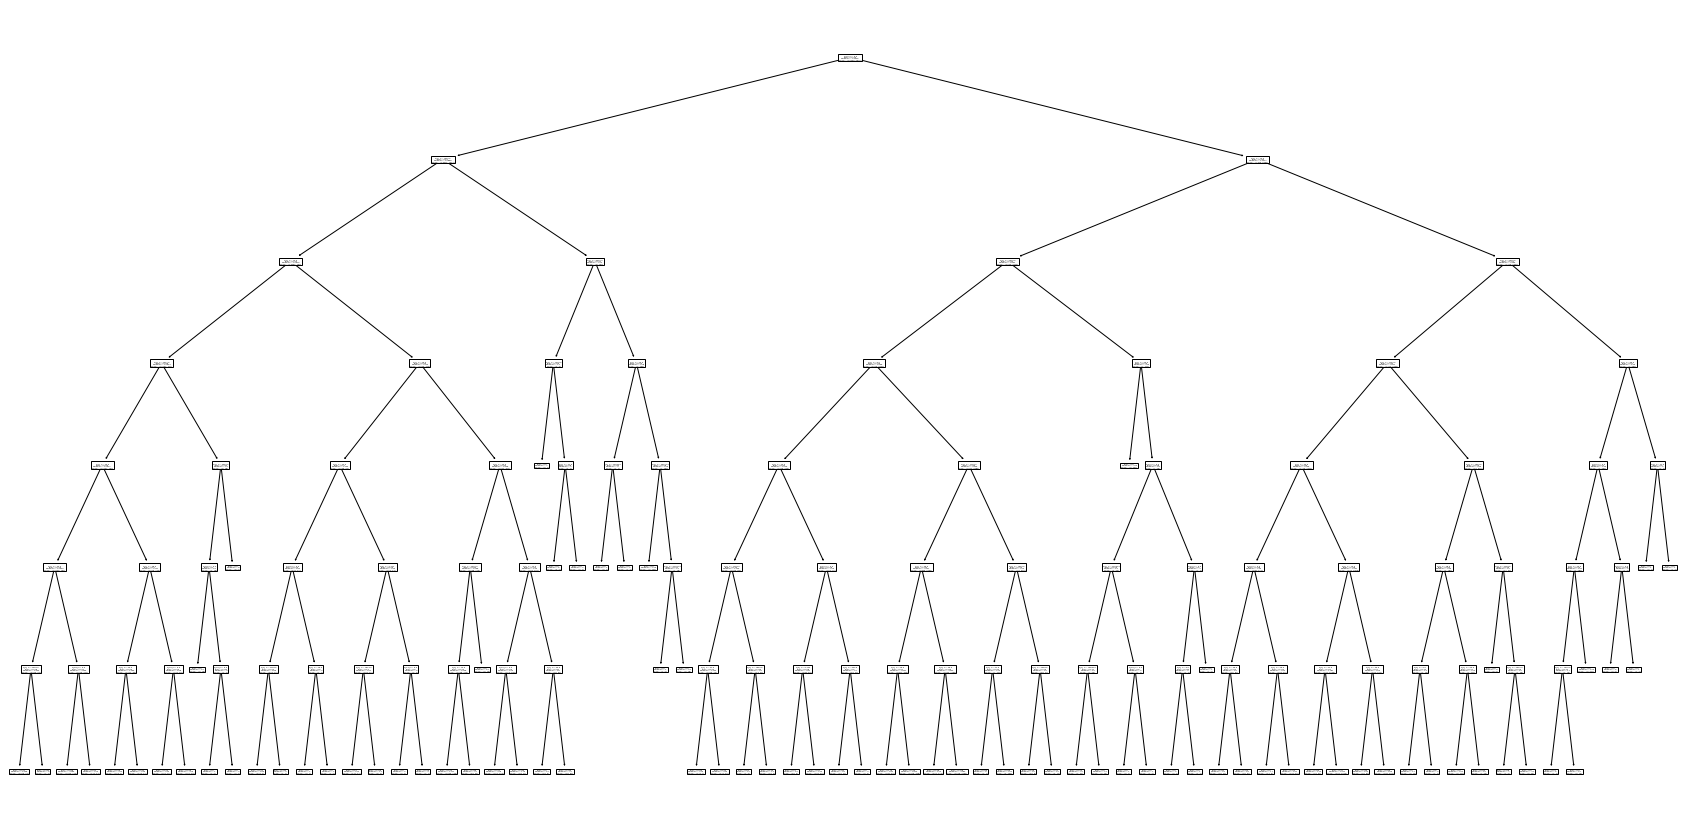

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15))
plot_tree(model)
plt.show()

In [53]:
# DataSet 불러와서 native-country drop 말고 전처리 해보기

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'

data = pd.read_csv(file_url)

In [54]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [55]:
# X,Y 변수 세팅
X = data.drop('class', axis=1)
Y = data['class'].map({' <=50K':1 , ' >50K':0})




In [56]:
print(X.info())

# workclass / marital-status / occupation / relationship / race / sex / native-country

print(X['workclass'].nunique())
print(X['marital-status'].nunique())
print(X['occupation'].nunique())
print(X['relationship'].nunique())
print(X['race'].nunique())
print(X['sex'].nunique())
print(X['native-country'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB
None
8
7
14
6
5
2
41


In [61]:
# 결측치

# workclass / occupation / native-country

X['workclass'] = X['workclass'].fillna('Private')





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB
None


In [64]:
X['occupation'] = X['occupation'].fillna('unknown')

In [65]:
X['native-country'] = X['native-country'].fillna('unknown')

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [70]:
# 5개 변수 scale

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X[['age','capital-gain','capital-loss','hours-per-week']] = ss.fit_transform(X[['age','capital-gain','capital-loss','hours-per-week']])





In [71]:
# 나머지 변수 dummy

X = pd.get_dummies(X)

In [73]:
## Decision Tree 

X_train , X_test, y_train , y_test = train_test_split(X, Y, test_size= 0.3, random_state= 50)



In [81]:
# Decision Tree Classifier 로드

# for i in range(1,21):

#   model_dc = DecisionTreeClassifier(max_depth=i)

#   model_dc.fit(X_train, y_train)

#   pred = model_dc.predict(X_test)

#   print(i, accuracy_score(y_test, pred))



model_dc = DecisionTreeClassifier(max_depth=8)
model_dc.fit(X_train, y_train)
pred = model_dc.predict(X_test)


In [82]:
## titanic decision tree

titanic_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'

data_titanic = pd.read_csv(titanic_url)



In [86]:
data_titanic.head()

X = data_titanic.drop('Survived', axis=1)[['Pclass','Sex','Age','SibSp','Parch','Embarked']]

y = data_titanic['Survived']



In [88]:
# 데이터 전처리


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [91]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler

# 스케일링

X[['Pclass','Age','SibSp','Parch']] = MinMaxScaler().fit_transform(X[['Pclass','Age','SibSp','Parch']] )


In [92]:
# Dummy

X = pd.get_dummies(X, drop_first= True)

In [93]:

# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 70)




,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
268,0.0,0.434531,0.000,0.000000,0,0,1
282,1.0,0.233476,0.000,0.000000,1,0,1
342,0.5,0.308872,0.000,0.000000,1,0,1
866,1.0,0.346569,0.000,0.000000,1,0,1
816,0.5,0.384267,0.125,0.166667,1,0,0
...,...,...,...,...,...,...,...
364,1.0,0.371701,0.000,0.000000,1,0,1
174,1.0,0.220910,0.125,0.166667,1,0,1
405,1.0,0.635587,0.000,0.000000,1,0,1
80,1.0,0.359135,0.000,0.000000,1,0,1


In [100]:
# Decision Tree
# for i in range(1,21):
#   model_titanic = DecisionTreeClassifier(max_depth=i)
#   model_titanic.fit(X_train, y_train)
#   pred = model_titanic.predict(X_test)  
#   print(i,round(accuracy_score(y_test, pred),4))


model_titanic = DecisionTreeClassifier(max_depth=4)
model_titanic.fit(X_train, y_train)
pred = model_titanic.predict(X_test)



